In [1]:
import pandas as pd
import requests
import csv

In [2]:

# URL for the CSV data
api_link = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"


In [9]:

# Read the data from the URL
with requests.get(api_link, stream=True) as r:
        lines = (line.decode('utf-8') for line in r.iter_lines())
        data = []
        for row in csv.reader(lines):
            data.append(row)
df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100
2,JHMZC5F37M,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035090400
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803
4,1N4AZ0CP5D,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005804


In [10]:
df.columns = df.loc[0]
df.drop(index=0, axis=0, inplace=True)
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100
2,JHMZC5F37M,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035090400
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803
4,1N4AZ0CP5D,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005804
5,5YJSA1E21H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072405
130440,1N4BZ1CV7N,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063100
130441,5YJYGDEE8M,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007002
130442,5YJXCBE22L,Island,Camano Island,WA,98282,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,53029971400


### 1. Cars and their types that do not qualify for clean alternative fuel vehicle

In [11]:
df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != "Clean Alternative Fuel Vehicle Eligible"]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
7,3FA6P0PU1G,Thurston,Tumwater,WA,98501,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010802
8,WA1F2AFY8P,Thurston,Lacey,WA,98516,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012225
9,1FADP5CU0E,Thurston,Rochester,WA,98579,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,53067012710
12,7SAYGDEF4N,Yakima,Yakima,WA,98908,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14,187486883,POINT (-120.56916 46.58514),PACIFICORP,53077002804
15,1FADP5FU4H,Thurston,Lacey,WA,98513,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,53067011623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,WBA13AG06M,Thurston,Olympia,WA,98501,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,22,196559310,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010700
130439,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072405
130440,1N4BZ1CV7N,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063100
130441,5YJYGDEE8M,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007002


### 2. TESLA cars with the model year, and model type made in Bellevue City

In [12]:
df[df["City"] == "Bellevue"]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
126,5YJ3E1EC4M,King,Bellevue,WA,98006,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,180688847,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024905
131,5YJSA1E25L,King,Bellevue,WA,98005,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330,0,41,103194346,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023603
139,5YJSA1E23L,King,Bellevue,WA,98006,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330,0,41,8740938,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025001
143,5YJ3E1EB0N,King,Bellevue,WA,98004,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,187579675,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024001
162,WBA33AG09N,King,Bellevue,WA,98005,2022,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,41,193976023,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130109,5YJSA1E69N,King,Bellevue,WA,98004,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,205837019,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023807
130187,7SAXCDE5XN,King,Bellevue,WA,98005,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,218176493,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023601
130219,5YJYGDEF4M,King,Bellevue,WA,98007,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,178923510,POINT (-122.12053 47.61334),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023603
130286,7SAYGDEE6N,King,Bellevue,WA,98027,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,220161672,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025008


### 3. Cars that have an electric range of more than 100, and were made after 2015

In [13]:
df["Electric Range"] = df["Electric Range"].astype(int)
df["Model Year"] = df["Model Year"].astype(int)

df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100
2,JHMZC5F37M,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035090400
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803
4,1N4AZ0CP5D,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005804
5,5YJSA1E21H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130439,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072405
130440,1N4BZ1CV7N,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063100
130441,5YJYGDEE8M,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007002
130442,5YJXCBE22L,Island,Camano Island,WA,98282,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,53029971400


In [18]:
df[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803
5,5YJSA1E21H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012226
13,5YJ3E1EC7L,Thurston,Lacey,WA,98503,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,53067011422
14,5YJ3E1EB2L,Thurston,Olympia,WA,98516,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130418,5YJYGDEE5L,Pierce,Tacoma,WA,98444,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063502
130429,1N4AZ1CP0J,Clallam,Sequim,WA,98382,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53009002001
130433,5YJYGDEEXL,King,Vashon,WA,98070,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
130437,5YJ3E1EB0J,Whatcom,Blaine,WA,98230,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073010405


### 4. plots to show the distribution between city and electric vehicle type

In [19]:
top_20 = df.groupby("City")["Electric Vehicle Type"].count().sort_values(ascending=False)[:20]
top_20

City
Seattle          22894
Bellevue          6748
Redmond           4820
Vancouver         4652
Kirkland          4071
Bothell           4024
Sammamish         3819
Renton            3311
Olympia           3140
Tacoma            2752
Bellingham        2219
Issaquah          2039
Spokane           1933
Mercer Island     1881
Kent              1876
Woodinville       1829
Lynnwood          1792
Everett           1737
Snohomish         1510
Gig Harbor        1474
Name: Electric Vehicle Type, dtype: int64

In [20]:
x = list(dict(top_20).keys())
y = list(dict(top_20).values())

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

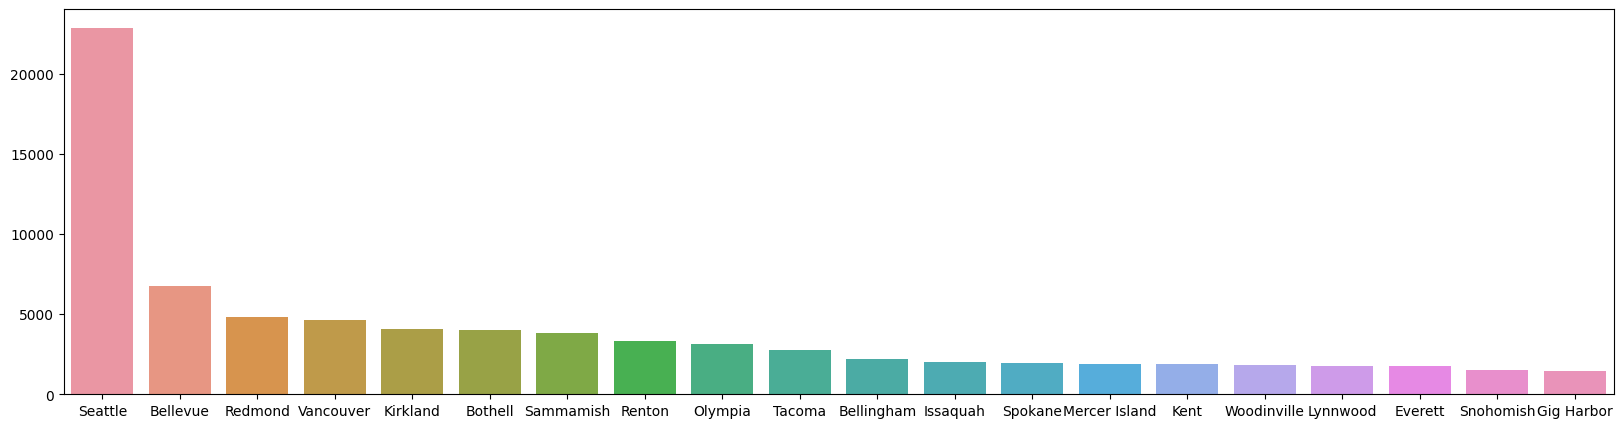

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=x, y=y)